# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
from pandas.api.types import is_numeric_dtype

# Data Gathering

In [2]:
df = pd.read_csv("../data/diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,length_mm,width_mm,depth_mm
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   length_mm   53940 non-null  float64
 9   width_mm    53940 non-null  float64
 10  depth_mm    53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


# Data Manipulation/Cleaning

In [4]:
# manipulate columns
df.drop(["Unnamed: 0"], axis=1, inplace=True) # useless strings

In [5]:


df["color"] = df["color"].map({'D' : 1, 'E' : 2, 'F' : 3, 'G' : 4 , 'H' : 5, 
                                'I' : 6 , 'J' : 7, 'K' : 8, 'L' : 9, 'M' : 10}) #label encoding
df["clarity"] = df["clarity"].map({'FL' : 1, 'IF' : 2, 'VVS1' : 3, 'VVS2' : 4 , 'VS1' : 5 , 'VS2': 6, 'SI1': 7,
                                   'SI2' : 8, 'SI3' : 9, 'I1' : 10 , 'I2' : 11, 'I3' : 12}) #label encoding
df["cut"] = df["cut"].map({'Ideal': 1, 'Premium': 2, 'Very Good': 3, 'Good' : 4, 'Fair' : 5, 'Poor' :6}) #label encoding

In [6]:
df


,carat,cut,color,clarity,depth,table,price,length_mm,width_mm,depth_mm
0,0.23,1,2,8,61.5,55.0,326,3.95,3.98,2.43
1,0.21,2,2,7,59.8,61.0,326,3.89,3.84,2.31
2,0.23,4,2,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,2,6,6,62.4,58.0,334,4.20,4.23,2.63
4,0.31,4,7,8,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,1,1,7,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,4,1,7,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,1,7,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,2,5,8,61.0,58.0,2757,6.15,6.12,3.74


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53940 non-null  float64
 1   cut        53940 non-null  int64  
 2   color      53940 non-null  int64  
 3   clarity    53940 non-null  int64  
 4   depth      53940 non-null  float64
 5   table      53940 non-null  float64
 6   price      53940 non-null  int64  
 7   length_mm  53940 non-null  float64
 8   width_mm   53940 non-null  float64
 9   depth_mm   53940 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


# Data Exploration

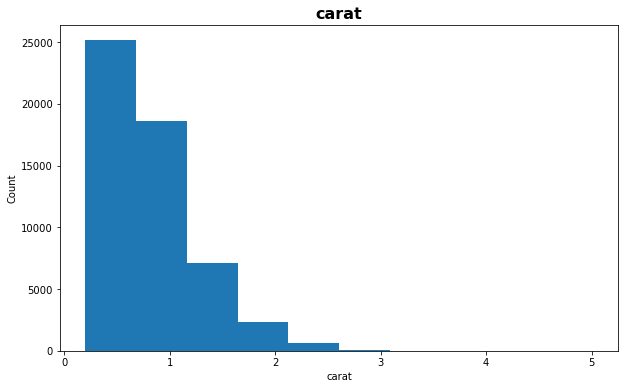

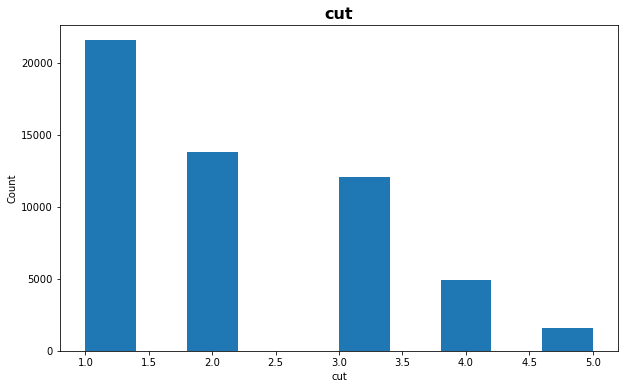

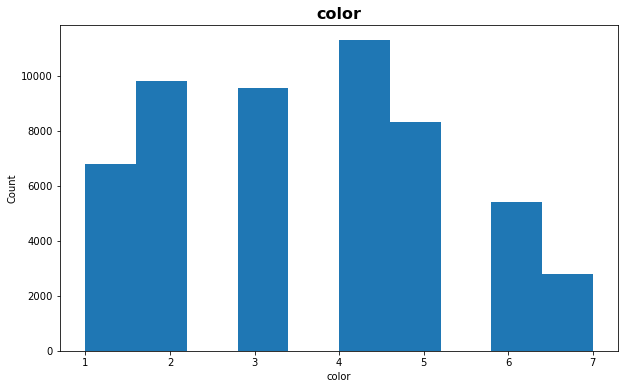

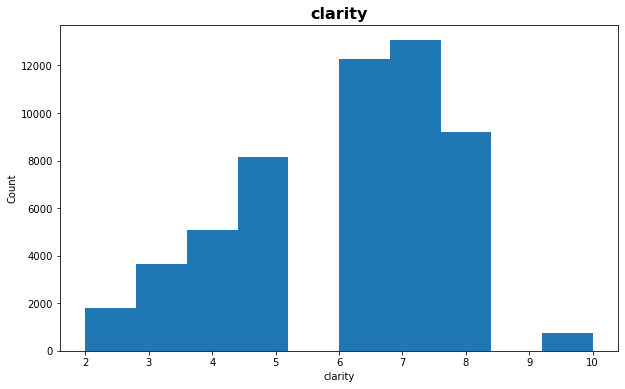

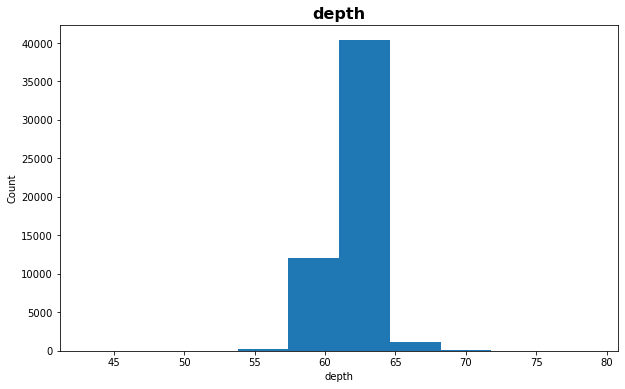

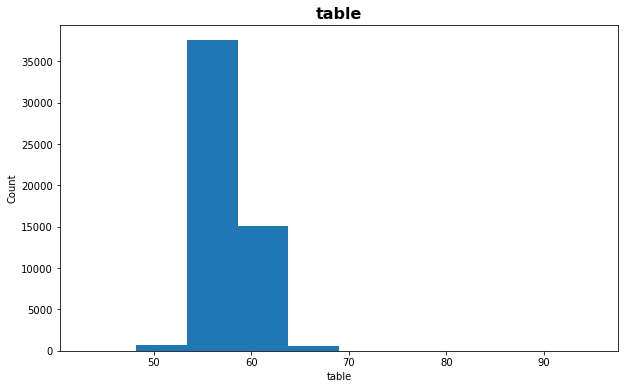

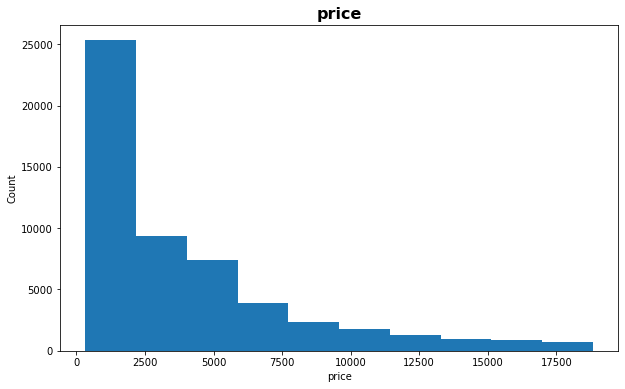

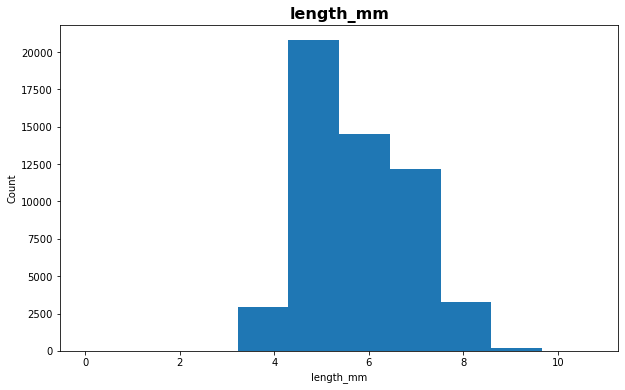

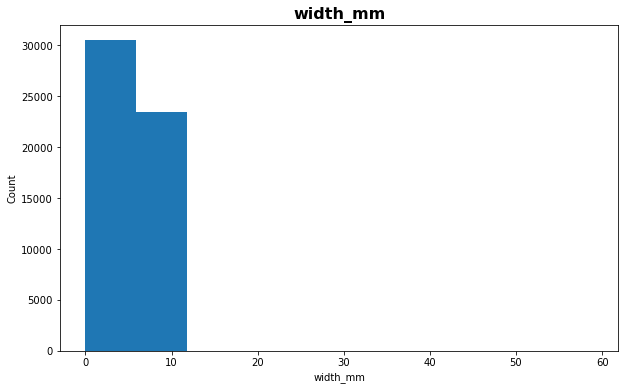

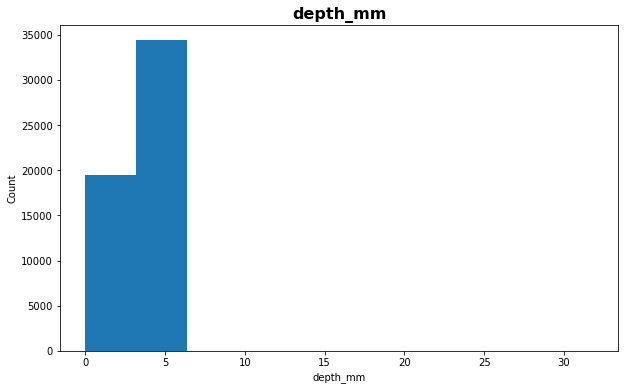

In [8]:
# Plot distributions
for col in df.columns:
    
    plt.figure(figsize=(10,6))
    plt.hist(df[col])
    plt.title(col, fontsize=16, fontweight="bold")
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.show()

## Correlations

In [9]:
df.corr()

,carat,cut,color,clarity,depth,table,price,length_mm,width_mm,depth_mm
carat,1.000000,0.134967,0.291437,0.355074,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,0.134967,1.000000,0.020519,0.192692,0.218055,0.433405,0.053491,0.125565,0.121462,0.149323
color,0.291437,0.020519,1.000000,-0.023079,0.047279,0.026465,0.172511,0.270287,0.263584,0.268227
clarity,0.355074,0.192692,-0.023079,1.000000,0.071840,0.160630,0.144217,0.373021,0.359150,0.368309
depth,0.028224,0.218055,0.047279,0.071840,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,0.433405,0.026465,0.160630,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,0.053491,0.172511,0.144217,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
length_mm,0.975094,0.125565,0.270287,0.373021,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
width_mm,0.951722,0.121462,0.263584,0.359150,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
depth_mm,0.953387,0.149323,0.268227,0.368309,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


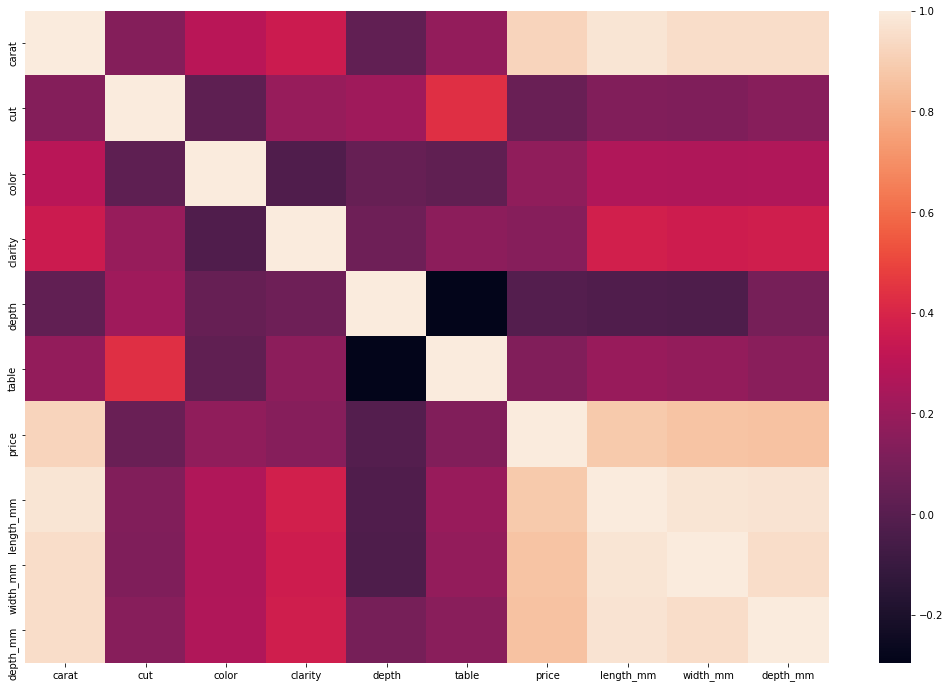

In [10]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr())
plt.show()

# Machine Learning

In [11]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split

## Linear Models First

In [12]:
features = df.drop("price", axis=1)
target = df['price']


In [13]:
X = features.to_numpy()
y = target.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Evaluation Report
The In Sample R2 Score: 0.9092517263784572
The In Sample RMSE: 1201.9520820408259

The Out Sample R2 Score: 0.9076446121106826
The Out Sample RMSE: 1211.6753324790864


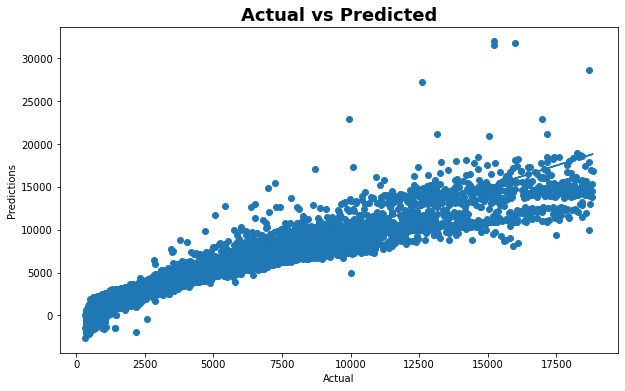

In [14]:
#initialize
reg = LinearRegression()

# fit
reg.fit(X_train, y_train)

# predict
in_preds = reg.predict(X_train)
out_preds = reg.predict(X_test)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
print(f"The In Sample RMSE: {np.sqrt(mean_squared_error(y_train, in_preds))}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
print(f"The Out Sample RMSE: {np.sqrt(mean_squared_error(y_test, out_preds))}")

# make Plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_preds)
plt.plot(y_test, y_test)
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()



Model Evaluation Report
The In Sample R2 Score: 0.9092517263784572
The In Sample RMSE: 1201.9520820408259

The Out Sample R2 Score: 0.9076446121106826
The Out Sample RMSE: 1211.6753324790864


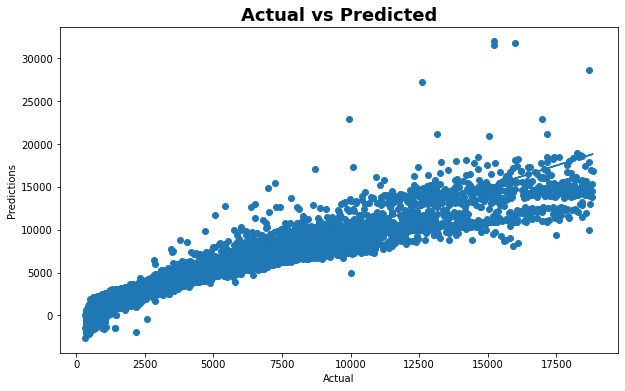

In [15]:
#initialize
knn = KNeighborsRegressor(n_neighbors=2)

# fit
knn.fit(X_train, y_train)

# predict
in_preds = reg.predict(X_train)
out_preds = reg.predict(X_test)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
print(f"The In Sample RMSE: {np.sqrt(mean_squared_error(y_train, in_preds))}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
print(f"The Out Sample RMSE: {np.sqrt(mean_squared_error(y_test, out_preds))}")

# make Plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_preds)
plt.plot(y_test, y_test)
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()

Model Evaluation Report
The In Sample R2 Score: 0.9092517263784572
The In Sample RMSE: 1201.9520820408259

The Out Sample R2 Score: 0.9076446121106826
The Out Sample RMSE: 1211.6753324790864


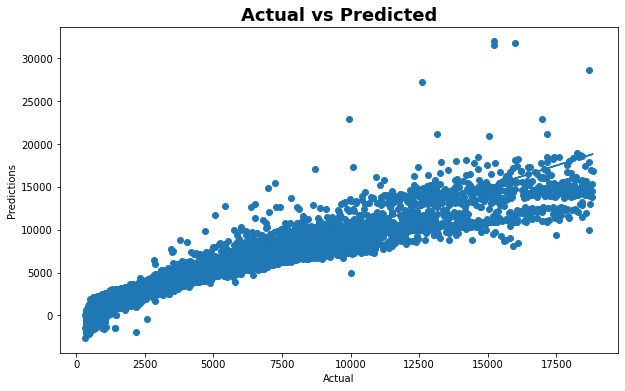

In [16]:
#initialize
svm = SVR()

# fit
svm.fit(X_train, y_train)

# predict
in_preds = reg.predict(X_train)
out_preds = reg.predict(X_test)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
print(f"The In Sample RMSE: {np.sqrt(mean_squared_error(y_train, in_preds))}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
print(f"The Out Sample RMSE: {np.sqrt(mean_squared_error(y_test, out_preds))}")

# make Plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_preds)
plt.plot(y_test, y_test)
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()

Model Evaluation Report
The In Sample R2 Score: 0.9092361303192542
The In Sample RMSE: 1202.0553617492924

The Out Sample R2 Score: 0.9076434629479834
The Out Sample RMSE: 1211.6828707927464


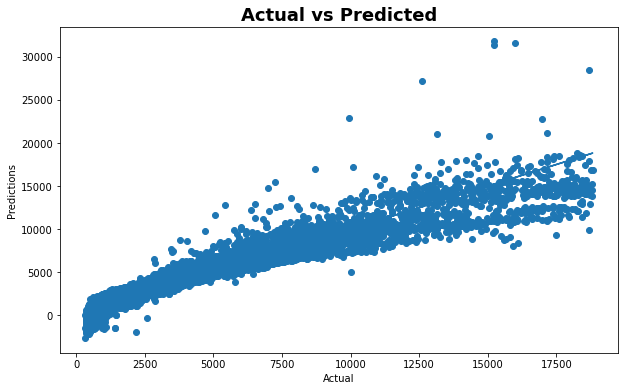

In [17]:
#initialize
lasso = Lasso()

# fit
lasso.fit(X_train, y_train)

# predict
in_preds = lasso.predict(X_train)
out_preds = lasso.predict(X_test)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
print(f"The In Sample RMSE: {np.sqrt(mean_squared_error(y_train, in_preds))}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
print(f"The Out Sample RMSE: {np.sqrt(mean_squared_error(y_test, out_preds))}")

# make Plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_preds)
plt.plot(y_test, y_test)
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()

Model Evaluation Report
The In Sample R2 Score: 0.9092513195555165
The In Sample RMSE: 1201.9547762030013

The Out Sample R2 Score: 0.9076494175687266
The Out Sample RMSE: 1211.6438089759652


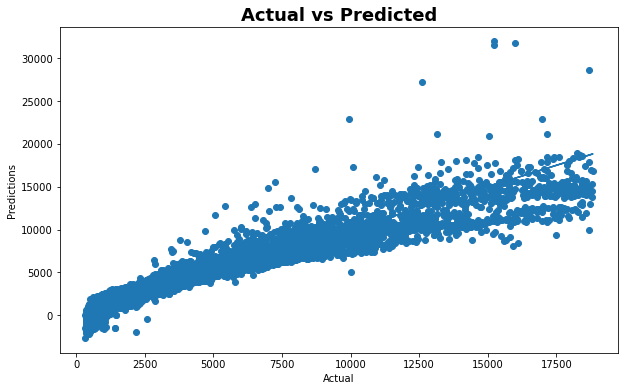

In [18]:
#initialize
ridge = Ridge()

# fit
ridge.fit(X_train, y_train)

# predict
in_preds = ridge.predict(X_train)
out_preds = ridge.predict(X_test)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
print(f"The In Sample RMSE: {np.sqrt(mean_squared_error(y_train, in_preds))}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
print(f"The Out Sample RMSE: {np.sqrt(mean_squared_error(y_test, out_preds))}")

# make Plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_preds)
plt.plot(y_test, y_test)
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()

Model Evaluation Report
The In Sample R2 Score: 0.8104628540520513
The In Sample RMSE: 1737.061267132269

The Out Sample R2 Score: 0.8197579525330729
The Out Sample RMSE: 1692.7125115007573


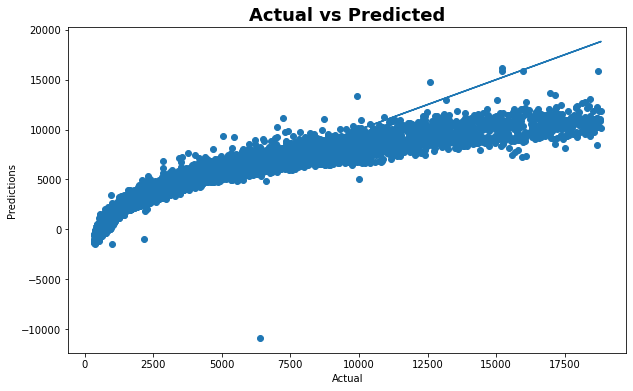

In [19]:
#initialize
en = ElasticNet()

# fit
en.fit(X_train, y_train)

# predict
in_preds = en.predict(X_train)
out_preds = en.predict(X_test)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
print(f"The In Sample RMSE: {np.sqrt(mean_squared_error(y_train, in_preds))}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
print(f"The Out Sample RMSE: {np.sqrt(mean_squared_error(y_test, out_preds))}")

# make Plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_preds)
plt.plot(y_test, y_test)
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()

## Trees

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

Model Evaluation Report
The In Sample R2 Score: 0.9999948355708338
The In Sample RMSE: 9.067323921015339

The Out Sample R2 Score: 0.9672643045804263
The Out Sample RMSE: 721.3830502359887


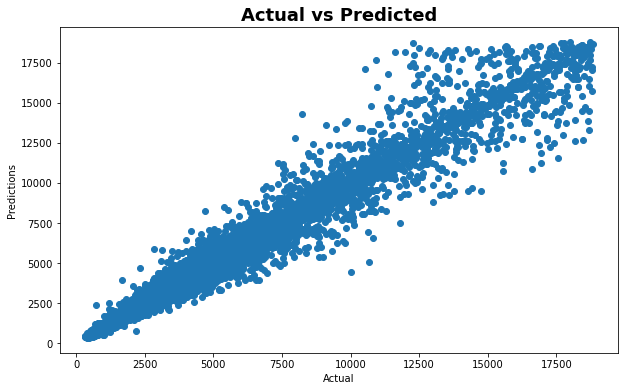

In [21]:
##initialize
dt = DecisionTreeRegressor()

# fit
dt.fit(X_train, y_train)

# predict
in_preds = dt.predict(X_train)
out_preds = dt.predict(X_test)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
print(f"The In Sample RMSE: {np.sqrt(mean_squared_error(y_train, in_preds))}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
print(f"The Out Sample RMSE: {np.sqrt(mean_squared_error(y_test, out_preds))}")

# make Plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_preds)
plt.plot(y_test, y_test)
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()

Model Evaluation Report
The In Sample R2 Score: 0.9974527574926916
The In Sample RMSE: 201.37386929270014

The Out Sample R2 Score: 0.9815012411448065
The Out Sample RMSE: 542.2835665875542


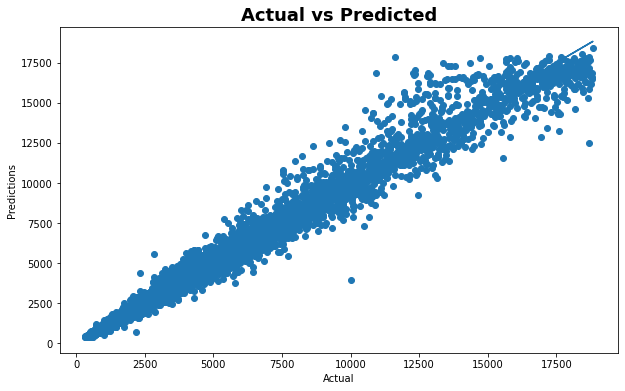

In [22]:
#initialize
rf = RandomForestRegressor()

# fit
rf.fit(X_train, y_train)

# predict
in_preds = rf.predict(X_train)
out_preds = rf.predict(X_test)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
print(f"The In Sample RMSE: {np.sqrt(mean_squared_error(y_train, in_preds))}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
print(f"The Out Sample RMSE: {np.sqrt(mean_squared_error(y_test, out_preds))}")

# make Plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_preds)
plt.plot(y_test, y_test)
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()

Model Evaluation Report
The In Sample R2 Score: 0.9150953460998446
The In Sample RMSE: 1162.6090951986453

The Out Sample R2 Score: 0.9127963562385438
The Out Sample RMSE: 1177.3957511283618


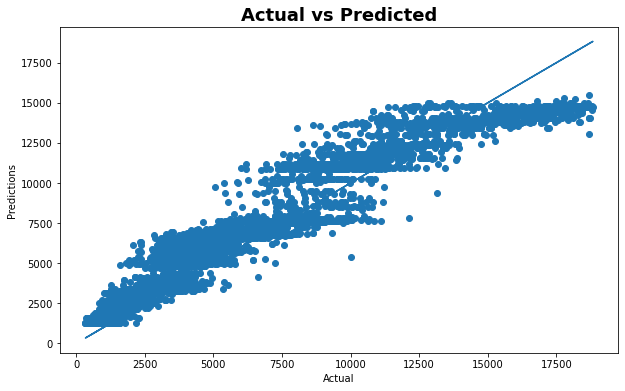

In [23]:
#initialize
ada = AdaBoostRegressor()

# fit
ada.fit(X_train, y_train)

# predict
in_preds = ada.predict(X_train)
out_preds = ada.predict(X_test)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
print(f"The In Sample RMSE: {np.sqrt(mean_squared_error(y_train, in_preds))}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
print(f"The Out Sample RMSE: {np.sqrt(mean_squared_error(y_test, out_preds))}")

# make Plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_preds)
plt.plot(y_test, y_test)
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()

Model Evaluation Report
The In Sample R2 Score: 0.9773703273701563
The In Sample RMSE: 600.2153581248416

The Out Sample R2 Score: 0.9766567222998114
The Out Sample RMSE: 609.1665763049286


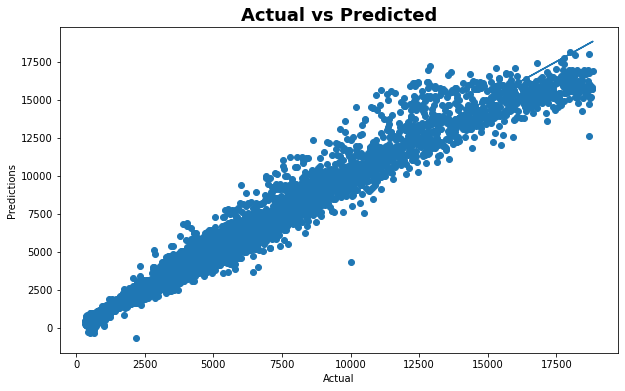

In [24]:
#initialize
gb = GradientBoostingRegressor()

# fit
gb.fit(X_train, y_train)

# predict
in_preds = gb.predict(X_train)
out_preds = gb.predict(X_test)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
print(f"The In Sample RMSE: {np.sqrt(mean_squared_error(y_train, in_preds))}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
print(f"The Out Sample RMSE: {np.sqrt(mean_squared_error(y_test, out_preds))}")

# make Plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_preds)
plt.plot(y_test, y_test)
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()

# Model Selection

In [25]:
# I choose Random Forest Regressor because it has the lowest MSE and highest R2 score
# and doesn't overfit as bad as the Decision Tree

Model Evaluation Report
The In Sample R2 Score: 0.9089370833646694
The In Sample RMSE: 1203.8674205587379



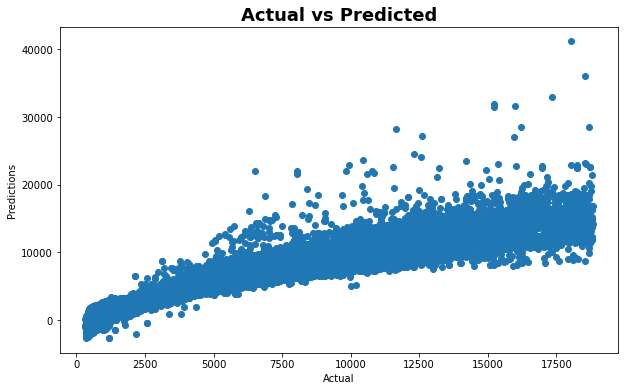

In [62]:
#initialize
gb_final = LinearRegression()

# fit
gb_final.fit(X, y)

# predict
in_preds = gb_final.predict(X)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y, in_preds)}")
print(f"The In Sample RMSE: {np.sqrt(mean_squared_error(y, in_preds))}")
print()

# make Plot
plt.figure(figsize=(10,6))
plt.scatter(y, in_preds)
plt.plot(y, y)
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()

# Create Submission

In [45]:
# # Read in data to predict
    # df_test = pd.read_csv("test.csv")
    # df_test.head()

In [46]:
# df_test.info()

In [47]:
# # manipulate columns
# df_test.drop(["Name", "Cabin", "Ticket"], axis=1, inplace=True) # drop useless strings

# df_test["FamilySize"] = df_test.SibSp + df_test.Parch + 1 # feature engineering
# df_test.drop(["SibSp", "Parch"], axis=1, inplace=True)

# df_test["Sex_Label"] = [1 if x == "male" else 0 for x in df_test.Sex] # label encoding
# df_test.drop("Sex", axis=1, inplace=True)

In [48]:
# # impute nulls from the TRAINING set
# df_test.Age.fillna(df.Age.mean(), inplace=True)
# df_test.Fare.fillna(df.Fare.mean(), inplace=True)

In [49]:
# df_test.info()

In [50]:
# df_test["Pclass"] = df_test.Pclass.astype(str)
# tree_dums_test = pd.get_dummies(df_test[["Pclass", "Embarked"]], drop_first=False)
# tree_dums_test

In [51]:
# df_test_tree = pd.concat([df_test[["Age", "Fare", "FamilySize", "Sex_Label"]], tree_dums_test], axis=1)
# df_test_tree

In [52]:
# # convert to list and then predict
# X_test_data = df_test_tree.to_numpy()

# test_preds = xgb_final.predict(X_test_data)
# test_preds

In [53]:
# final_sub = pd.DataFrame()
# final_sub["PassengerId"] = df_test.PassengerId
# final_sub["Survived"] = test_preds

In [54]:
# final_sub

In [55]:
# final_sub.to_csv("submission.csv", index=False)

In [63]:
import pickle

In [64]:
# save model to disk
filename = 'finalized_model.sav'
pickle.dump(gb_final, open(filename, 'wb'))

In [58]:
# my_new_model = pickle.load(filename)